# Import

In [1]:
# relevant imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import raw data
df = pd.read_csv("hotdog_data_raw.csv")

df

,Timestamp,What year are you in?,Is hotdog a sandwich?
0,8/29/2025 17:17:56,4,Yes
1,8/29/2025 18:33:07,3,Yes
2,8/29/2025 18:33:08,4,Yes
3,8/29/2025 18:33:28,3,Yes
4,8/29/2025 18:33:41,1,No
...,...,...,...
202,9/1/2025 12:11:24,4,No
203,9/1/2025 12:13:56,3,No
204,9/1/2025 12:18:07,4,Yes
205,9/1/2025 12:18:41,2,Yes


# Cleaning

In [3]:
# rename columns for simplicity
df.rename(columns={
    'Timestamp': 'timestamp',
    'What year are you in?': 'year',
    'Is hotdog a sandwich?': 'is_sandwich'
}, inplace=True)

# convert timestamp to proper datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# save cleaned df
df.to_csv("hotdog_data_clean.csv", index=False)

df

,timestamp,year,is_sandwich
0,2025-08-29 17:17:56,4,Yes
1,2025-08-29 18:33:07,3,Yes
2,2025-08-29 18:33:08,4,Yes
3,2025-08-29 18:33:28,3,Yes
4,2025-08-29 18:33:41,1,No
...,...,...,...
202,2025-09-01 12:11:24,4,No
203,2025-09-01 12:13:56,3,No
204,2025-09-01 12:18:07,4,Yes
205,2025-09-01 12:18:41,2,Yes


# Exploratory Plots

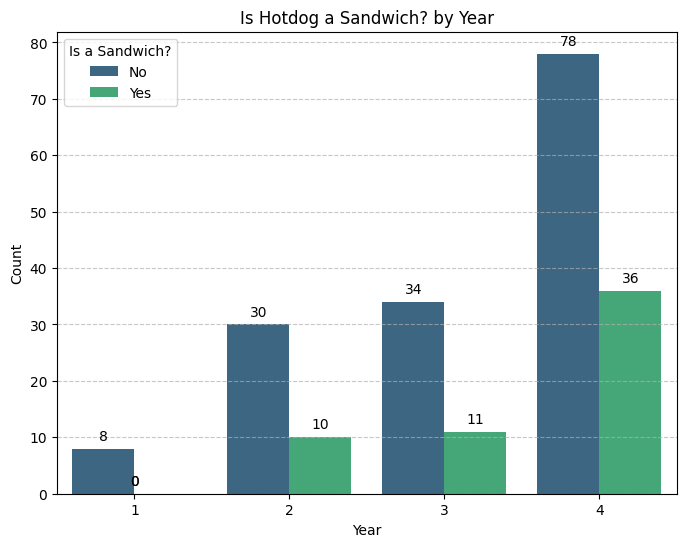

In [4]:
# show raw counts for 'is_sandwich', grouped by 'year'
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='year', hue='is_sandwich', palette='viridis')
plt.title('Is Hotdog a Sandwich? by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Is a Sandwich?')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add values on top of the columns
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

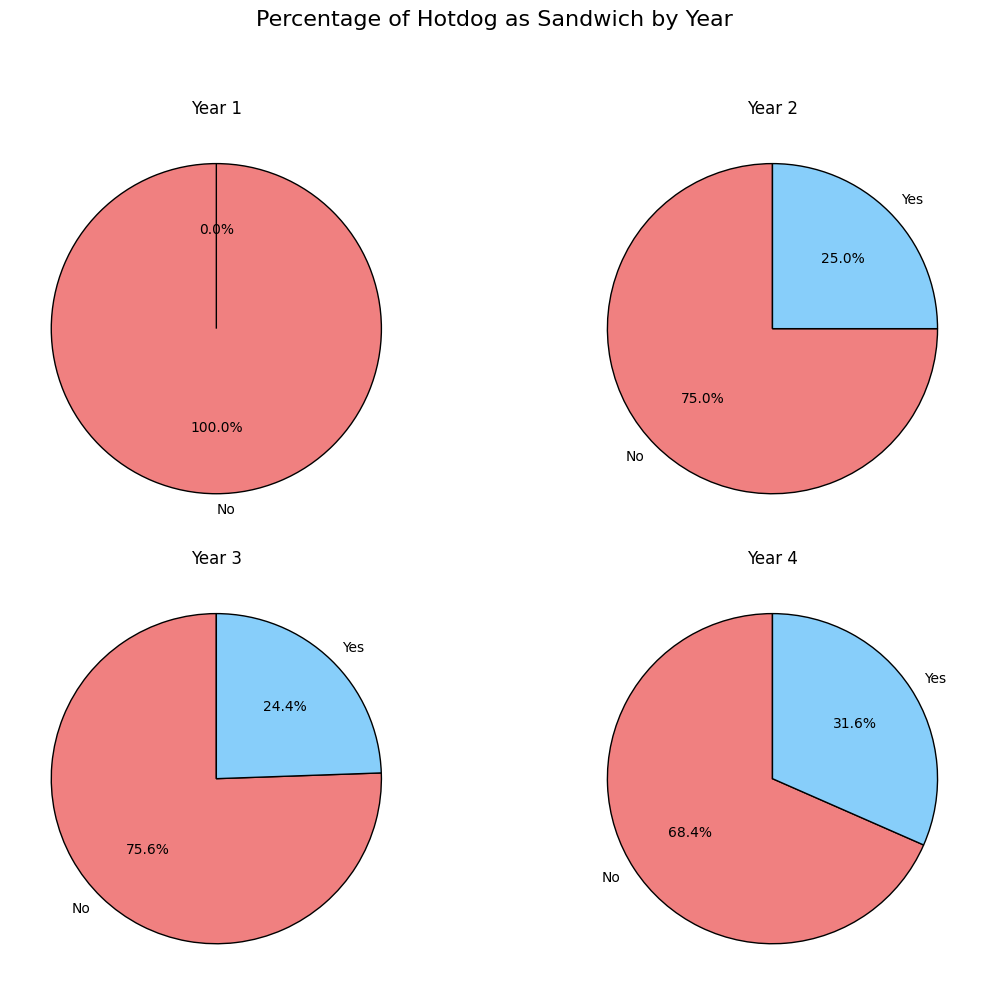

In [7]:
# calculate pie chart percentages of 'is_sandwich' for each 'year'
sandwich_percentages = df.groupby('year')['is_sandwich'].value_counts(normalize=True).unstack()
years = sorted(df['year'].unique())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

fig.suptitle('Percentage of Hotdog as Sandwich by Year', fontsize=16, y=1.02)

color_map = {'No': 'lightcoral', 'Yes': 'lightskyblue'}

for i, year in enumerate(years):
    ax = axes[i]
    plot_data = sandwich_percentages.loc[year]

    colors_for_pie = [color_map[label] for label in plot_data.index]
    plot_data.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=colors_for_pie,
                        wedgeprops={'edgecolor': 'black'})
    ax.set_title(f'Year {year}')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()